<a href="https://colab.research.google.com/github/csmaster23/machine_learning_principles/blob/main/Poisson_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [ ]:
'''
  In the Poisson distribution, λ (lambda) represents the average number of
  events that are expected to occur in a fixed interval of time or space.
  It's the key parameter of the Poisson distribution and directly influences the
  shape of the distribution.

  Lambda is the expected rate at which events happen over a given interval.
  For example, if a website typically gets 10 user signups per hour, then
  𝜆 = 10
'''

In [ ]:
'''
  Using the Poisson Distribution in Data Science and Statistics:
    1. Modeling Rare Events:
      - Poisson is often used to model rare events that occur independently and at
        a constant rate.
      - Example: Modeling the number of customer complaints in a call center per hour.
        If on average 5 calls are received in an hour, we could use a Poisson distribution with
        λ=5 to model how likely it is to receive more or fewer calls.

    2. Event Occurrence Prediction:
      - Risk management: In finance or insurance, Poisson models can estimate
        the likelihood of rare catastrophic events (like insurance claims).
      - Inventory management: Poisson can predict demand for items that are
        rarely sold, helping avoid overstocking.

    3. Hypothesis Testing:
      - You can compare observed event counts to expected counts using Poisson models.
      - Example: A hospital might use the Poisson distribution to check whether
        the number of patient admissions follows the expected rate. If admissions
        spike well above the predicted Poisson distribution, it might indicate
        an unusual event (like an epidemic or system malfunction).

    4. Anomaly Detection:
      - Poisson models can flag anomalies in systems where the number of
        expected events follows a known rate.
      - Example: If a system is designed to process 100 orders per hour, and
        suddenly 500 orders are processed, a Poisson model might detect this as
        an anomaly, triggering further investigation.

    5. Customer Behavior:
      - Businesses can model customer behaviors like the number of purchases
        or visits to a store. For instance, if the average customer buys 2 items
        per visit, a Poisson model with λ=2 could help predict how many customers
        are likely to make exactly 3 or 4 purchases.
'''

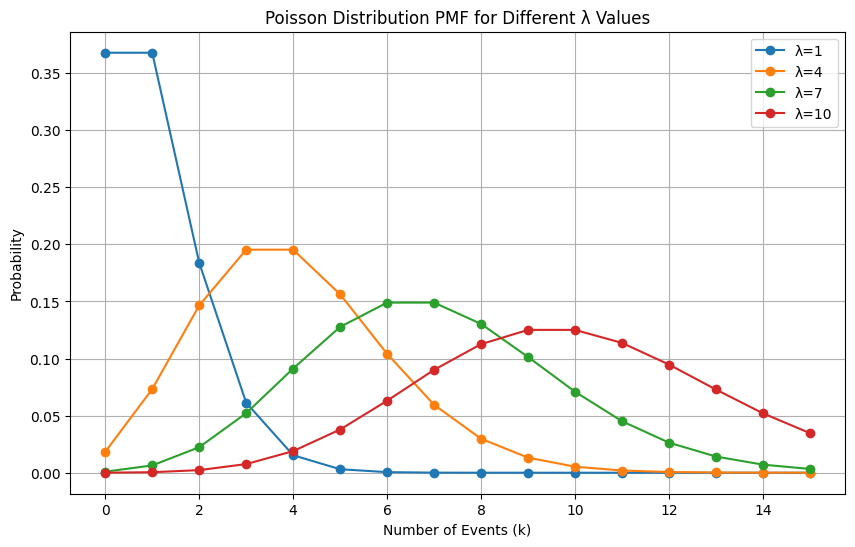

In [2]:
# Poisson Distribution Explanation
def poisson_pmf(k, lam):
    return (lam ** k * np.exp(-lam)) / np.math.factorial(k)

# Visualization of Poisson Distribution for different lambda values
def plot_poisson_distributions(lambdas, k_max=15):
    k_values = np.arange(0, k_max+1)
    plt.figure(figsize=(10, 6))

    for lam in lambdas:
        pmf_values = poisson.pmf(k_values, lam)
        plt.plot(k_values, pmf_values, marker='o', linestyle='-', label=f'λ={lam}')

    plt.title('Poisson Distribution PMF for Different λ Values')
    plt.xlabel('Number of Events (k)')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call function to plot Poisson for different lambda values
plot_poisson_distributions([1, 4, 7, 10])


Normal Client Requests: [7 2 3 3 4 2 3 0 5 1 1 2 3 6 4 5 2 5 1 5 1 4 2 5 6 4 2 2 4 2 2 4 4 2 1 2 3
 3 2 2 3 4 4 2 1 6 3 5 3 3 2 3 4 8 6 6 1 4 3 5]
Bad Actor Requests: [ 9 10  9 14 11  4 10 17  7  7  4 10 15 11  9 11  8  4  5  5 14 11 13 13
  4 11 15 12  6 13 14 14  5  8  9 10 10  8  7 10  8 13 10  9  5 13  8 10
 13 12 10  9  7  9 13 10 22  6 12  8]


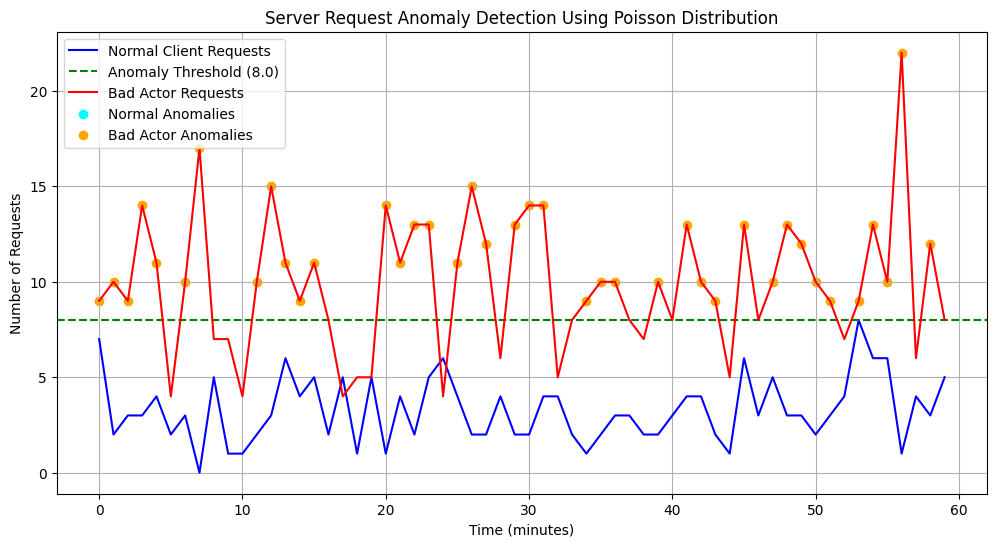

Normal Client Anomalies Detected: 0
Bad Actor Anomalies Detected: 40


In [4]:
# Set the lambda for normal client behavior
lambda_normal = 3  # Average 3 requests per minute for normal clients
lambda_anomalous = 10  # Bad actor sending too many requests

# Simulate 60 minutes of client requests (Normal and Bad Actor)
# Simulating 60 minutes of requests with an average of 3 requests per minute (lambda=3) etc.
# RVS helps us randomly create samples from a poisson given mu per time interval
#   and size (number of time intervals to sample for)
normal_client_requests = poisson.rvs(mu=lambda_normal, size=60)
bad_actor_requests = poisson.rvs(mu=lambda_anomalous, size=60)

print(f"Normal Client Requests:\n{normal_client_requests}")
print(f"Bad Actor Requests:\n{bad_actor_requests}")

# Function to detect anomalies based on a Poisson threshold
def detect_anomalies(requests, lambda_threshold, alpha=0.01):
    # Compute the upper Poisson quantile (1 - alpha) for the given lambda
    threshold = poisson.ppf(1 - alpha, lambda_threshold)

    # Detect anomalies (requests > threshold)
    anomalies = requests > threshold
    return anomalies, threshold

# Detect anomalies for the normal client and the bad actor
alpha = 0.01  # 99% confidence threshold
normal_anomalies, normal_threshold = detect_anomalies(normal_client_requests, lambda_normal, alpha)
bad_actor_anomalies, bad_actor_threshold = detect_anomalies(bad_actor_requests, lambda_normal, alpha)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(normal_client_requests, label="Normal Client Requests", color='blue')
plt.axhline(y=normal_threshold, color='green', linestyle='--', label=f"Anomaly Threshold ({normal_threshold:.1f})")

# Plot bad actor requests
plt.plot(bad_actor_requests, label="Bad Actor Requests", color='red')

# Highlight anomalies for normal and bad actor
plt.scatter(np.where(normal_anomalies)[0], normal_client_requests[normal_anomalies], color='cyan', label="Normal Anomalies")
plt.scatter(np.where(bad_actor_anomalies)[0], bad_actor_requests[bad_actor_anomalies], color='orange', label="Bad Actor Anomalies")

plt.title('Server Request Anomaly Detection Using Poisson Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Number of Requests')
plt.legend()
plt.grid(True)
plt.show()

# Show anomaly detection summary
print(f"Normal Client Anomalies Detected: {np.sum(normal_anomalies)}")
print(f"Bad Actor Anomalies Detected: {np.sum(bad_actor_anomalies)}")
